In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("debt_maturity_data_2023.xlsx")

In [2]:
df = df.dropna(subset=['ST_DEBT', 'LT_DEBT']) # exclude observations with missing short-term or long-term debt
df = df[df['ST_DEBT']+df['LT_DEBT'] != 0] # exclude observations with zero total debt

In [3]:
df.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.0,-25.043,36,Australia
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.0,-93.479,36,Australia
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.0,-21.670,36,Australia
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.0,-6.018,36,Australia
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,0.0,-81.811,36,Australia


In [4]:
pct_1 = (df['LT_DEBT'] / (df['LT_DEBT'] + df['ST_DEBT'])).quantile(0.01)
pct_99 = (df['LT_DEBT'] / (df['LT_DEBT'] + df['ST_DEBT'])).quantile(0.99)

In [5]:
df['debt_maturity_ratio'] = df['LT_DEBT'] / (df['LT_DEBT'] + df['ST_DEBT'])
df['debt_maturity_ratio'] = df['debt_maturity_ratio'].clip(lower=pct_1, upper=pct_99)

In [6]:
df.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.0,-25.043,36,Australia,0.991081
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.0,-93.479,36,Australia,0.989539
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.0,-21.670,36,Australia,0.771123
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.0,-6.018,36,Australia,0.997348
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,0.0,-81.811,36,Australia,0.914123


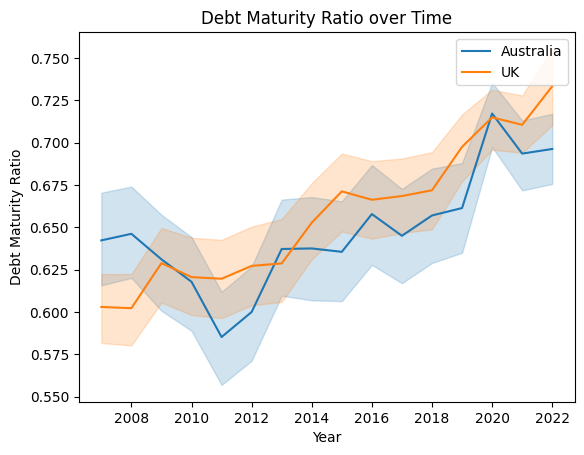

In [7]:
australia = df[df['COUNTRY'] == 'Australia']
uk = df[df['COUNTRY'] == 'UK']

sns.lineplot(x='year', y='debt_maturity_ratio', data=australia, label='Australia')
sns.lineplot(x='year', y='debt_maturity_ratio', data=uk, label='UK')

plt.title('Debt Maturity Ratio over Time')
plt.xlabel('Year')
plt.ylabel('Debt Maturity Ratio')
plt.legend()
plt.show()

In [67]:
df_au1 = australia
df_uk1 = uk
df_au1 = df_au1.dropna()
df_uk1 = df_uk1.dropna()

In [138]:
df_au1.head()


,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio,Tangibility,Market_to_book,Log_TA,Profitability
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,...,95.218,0.000,-25.043,36,Australia,0.991,0.669,0.949,4.556,-0.107
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,...,31.992,0.000,-93.479,36,Australia,0.990,0.198,3.581,3.465,-2.275
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,...,39.226,0.000,-21.670,36,Australia,0.771,0.182,3.116,3.669,-0.432
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,...,10.955,0.000,-6.018,36,Australia,0.997,0.064,3.388,2.394,-0.228
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,...,819.914,0.000,-81.811,36,Australia,0.914,0.746,1.049,6.709,-0.059


In [142]:
df_uk1.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio,Tangibility,Market_to_book,Log_TA,Profitability
94775,C826AA790,2007.000,354.325,247.584,219.461,180.182,55.702,17.556,154.937,4.195,...,703.027,5.881,31.428,826.000,UK,0.240,0.437,1.111,6.555,0.157
94776,C826AA790,2008.000,334.845,282.742,75.542,188.143,45.463,6.394,111.215,3.427,...,488.823,6.452,13.861,826.000,UK,0.123,0.332,0.664,6.192,0.083
94777,C826AA790,2009.000,289.729,188.246,119.296,174.570,31.163,5.231,16.203,2.651,...,468.060,6.464,-7.389,826.000,UK,0.144,0.056,0.809,6.149,-0.017
94778,C826AA790,2010.000,289.599,205.841,120.835,187.144,11.362,4.069,15.234,2.475,...,451.792,3.378,11.827,826.000,UK,0.264,0.053,0.771,6.113,0.088
94779,C826AA790,2011.000,284.992,177.924,160.265,184.381,1.422,5.083,15.622,1.216,...,442.536,4.941,8.934,826.000,UK,0.781,0.055,0.915,6.093,0.075


In [137]:
df1_au= df_au1[["Tangibility", "Market_to_book", "year", "Log_TA", "Profitability", "debt_maturity_ratio", "COUNTRY"]]


In [102]:
df1_au = df1_au.dropna()

In [105]:
pd.set_option('display.float_format', '{:.3f}'.format)
df1_au[["Tangibility", "Market_to_book", "Log_TA", "Profitability", "debt_maturity_ratio"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,9017.000,0.302,0.277,0.000,0.052,0.217,0.514,0.998
Market_to_book,9017.000,1.637,1.884,0.048,0.917,1.176,1.741,49.065
Log_TA,9017.000,5.600,1.827,2.306,4.184,5.404,6.772,11.885
Profitability,9017.000,0.070,0.374,-10.644,0.029,0.094,0.157,22.738
debt_maturity_ratio,9017.000,0.651,0.345,0.000,0.410,0.774,0.951,1.000


In [106]:
df1_au.head()

,Tangibility,Market_to_book,year,Log_TA,Profitability,debt_maturity_ratio,COUNTRY
0,0.669,0.949,2009,4.556,-0.107,0.991,Australia
1,0.198,3.581,2010,3.465,-2.275,0.990,Australia
2,0.182,3.116,2011,3.669,-0.432,0.771,Australia
3,0.064,3.388,2012,2.394,-0.228,0.997,Australia
4,0.746,1.049,2007,6.709,-0.059,0.914,Australia


In [107]:
# To remove outliers, we cap the variables at top and bottom 1%
# That means at 0.01 and 0.99 quantiles
df1_au1=df1_au.loc[:, df1_au.columns != 'COUNTRY']
df1_au1=df1_au1.dropna()
df1_au1 = df1_au1.clip(lower=df1_au1.quantile(0.01), upper=df1_au1.quantile(0.99), axis=1)

df1_au1.head()

,Tangibility,Market_to_book,year,Log_TA,Profitability,debt_maturity_ratio
0,0.669,0.949,2009,4.556,-0.107,0.991
1,0.198,3.581,2010,3.465,-0.703,0.990
2,0.182,3.116,2011,3.669,-0.432,0.771
3,0.064,3.388,2012,2.493,-0.228,0.997
4,0.746,1.049,2007,6.709,-0.059,0.914


In [119]:
# This is the unclipped distribution
df1_au.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

C:\Users\ritik\AppData\Local\Temp\ipykernel_22532\1494906299.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_au.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])


,Tangibility,Market_to_book,year,Log_TA,Profitability,debt_maturity_ratio
0.000,0.000,0.048,2007.000,2.306,-10.644,0.000
0.010,0.000,0.498,2007.000,2.493,-0.703,0.000
0.250,0.052,0.917,2010.000,4.184,0.029,0.410
0.500,0.217,1.176,2015.000,5.404,0.094,0.774
0.750,0.514,1.741,2019.000,6.772,0.157,0.951
0.990,0.937,8.027,2022.000,10.060,0.485,1.000
1.000,0.998,49.065,2022.000,11.885,22.738,1.000


In [121]:
# This is the clipped distribution which has replaced the outliers
df1_au1.quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,Tangibility,Market_to_book,year,Log_TA,Profitability,debt_maturity_ratio
0.000,0.000,0.498,2007.000,2.493,-0.703,0.000
0.010,0.000,0.499,2007.000,2.493,-0.702,0.000
0.250,0.052,0.917,2010.000,4.184,0.029,0.410
0.500,0.217,1.176,2015.000,5.404,0.094,0.774
0.750,0.514,1.741,2019.000,6.772,0.157,0.951
0.990,0.937,8.011,2022.000,10.059,0.485,1.000
1.000,0.937,8.027,2022.000,10.060,0.485,1.000


In [122]:
df1_au1.describe().T

,count,mean,std,min,25%,50%,75%,max
Tangibility,9017.000,0.302,0.277,0.000,0.052,0.217,0.514,0.937
Market_to_book,9017.000,1.572,1.204,0.498,0.917,1.176,1.741,8.027
year,9017.000,2014.600,4.761,2007.000,2010.000,2015.000,2019.000,2022.000
Log_TA,9017.000,5.594,1.806,2.493,4.184,5.404,6.772,10.060
Profitability,9017.000,0.074,0.177,-0.703,0.029,0.094,0.157,0.485
debt_maturity_ratio,9017.000,0.651,0.345,0.000,0.410,0.774,0.951,1.000


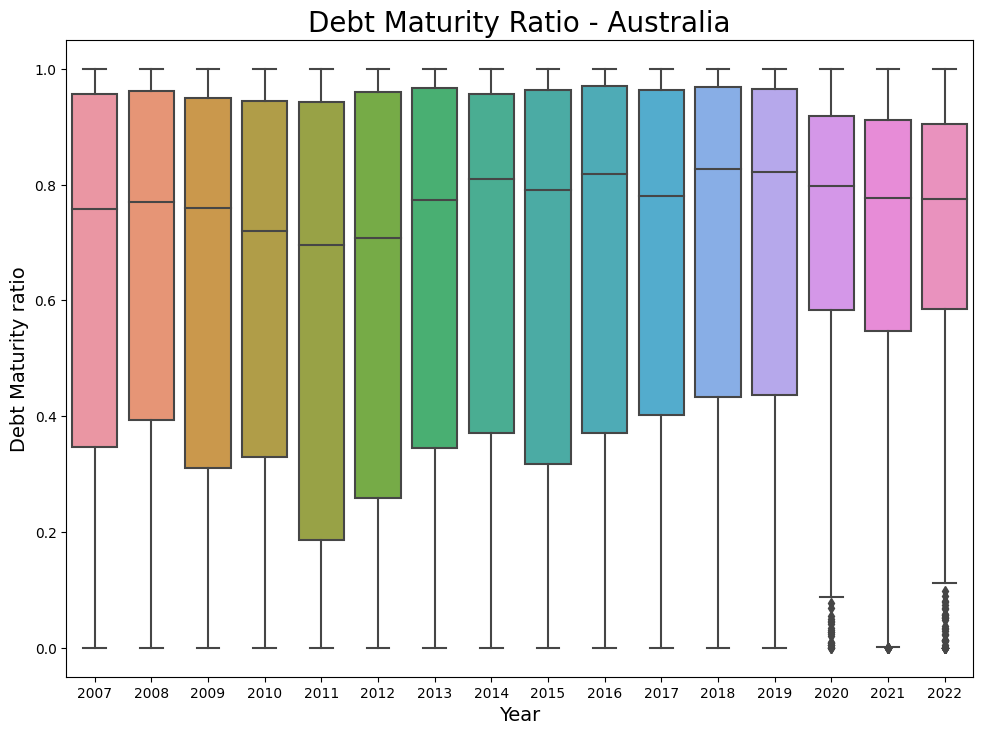

In [147]:
#### The Boxplot shows the distribution of a variable.
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(x="year",y="debt_maturity_ratio",data=df1_au1,ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Debt Maturity ratio', fontsize=14)
    ax.set_title('Debt Maturity Ratio - Australia', fontsize=20)

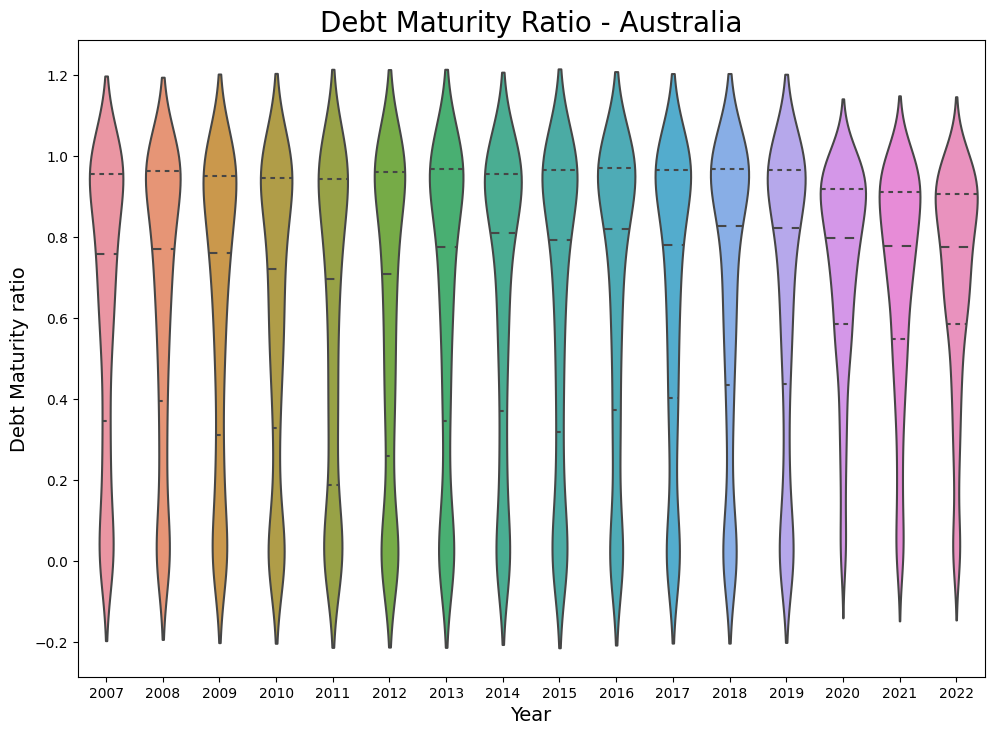

In [148]:
with sns.axes_style(style=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    sns.violinplot(x="year",y="debt_maturity_ratio",data=df1_au1,split='True', inner="quartile",ax=ax)
    
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Debt Maturity ratio', fontsize=14)
    ax.set_title('Debt Maturity Ratio - Australia', fontsize=20)

In [8]:
# Calculate mean debt maturity ratio pre and post covid for Australia
covid_start_year = 2020

australia_pre_covid = australia[australia['year'] < covid_start_year]['debt_maturity_ratio'].mean()
australia_post_covid = australia[australia['year'] >= covid_start_year]['debt_maturity_ratio'].mean()

print("Australia pre-covid mean debt maturity ratio:", australia_pre_covid)
print("Australia post-covid mean debt maturity ratio:", australia_post_covid)

Australia pre-covid mean debt maturity ratio: 0.6347869829158772
Australia post-covid mean debt maturity ratio: 0.7022461327075815


In [9]:
# Subset data for 2007 and 2022
df_2007 = df[df['year'] == 2007]
df_2022 = df[df['year'] == 2022]

# Subset data for Australia and the UK
australia_2007 = df_2007[df_2007['COUNTRY'] == 'Australia']
australia_2022 = df_2022[df_2022['COUNTRY'] == 'Australia']

uk_2007 = df_2007[df_2007['COUNTRY'] == 'UK']
uk_2022 = df_2022[df_2022['COUNTRY'] == 'UK']

In [10]:
df.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.0,-25.043,36,Australia,0.991081
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.0,-93.479,36,Australia,0.989539
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.0,-21.670,36,Australia,0.771123
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.0,-6.018,36,Australia,0.997348
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,0.0,-81.811,36,Australia,0.914123


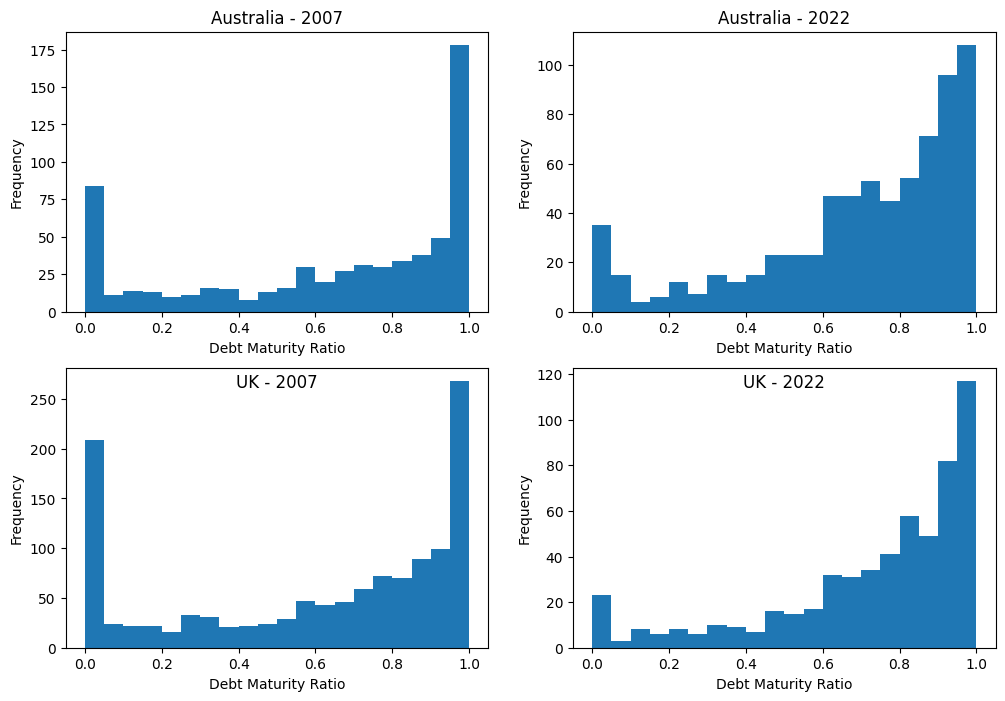

In [11]:
# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(australia_2007['debt_maturity_ratio'], bins=20)
axs[0, 0].set_title('Australia - 2007')
axs[0, 0].set_xlabel('Debt Maturity Ratio')
axs[0, 0].set_ylabel('Frequency')
axs[0, 1].hist(australia_2022['debt_maturity_ratio'], bins=20)
axs[0, 1].set_title('Australia - 2022')
axs[0, 1].set_xlabel('Debt Maturity Ratio')
axs[0, 1].set_ylabel('Frequency')
axs[1, 0].hist(uk_2007['debt_maturity_ratio'], bins=20)
axs[1, 0].set_title('UK - 2007',y=0.9)
axs[1, 0].set_xlabel('Debt Maturity Ratio')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].hist(uk_2022['debt_maturity_ratio'], bins=20)
axs[1, 1].set_title('UK - 2022',y=0.9)
axs[1, 1].set_xlabel('Debt Maturity Ratio')
axs[1, 1].set_ylabel('Frequency')
plt.show()

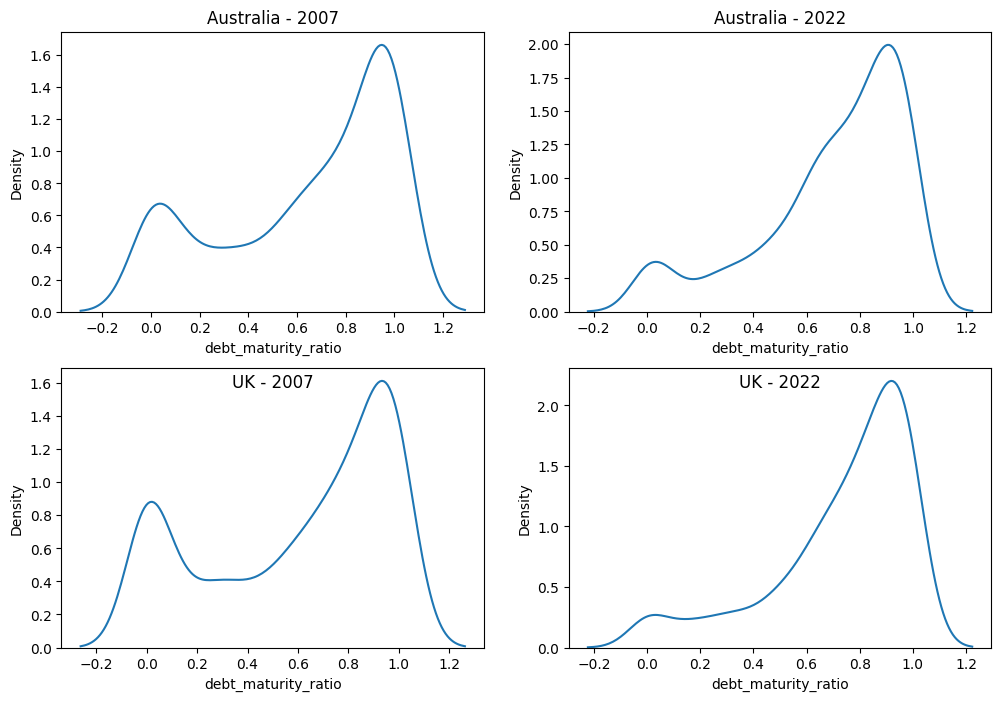

In [12]:
# Plot kernel density plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.kdeplot(australia_2007['debt_maturity_ratio'], ax=axs[0, 0])
axs[0, 0].set_title('Australia - 2007')
sns.kdeplot(australia_2022['debt_maturity_ratio'], ax=axs[0, 1])
axs[0, 1].set_title('Australia - 2022')
sns.kdeplot(uk_2007['debt_maturity_ratio'], ax=axs[1, 0])
axs[1, 0].set_title('UK - 2007',y=0.9)
sns.kdeplot(uk_2022['debt_maturity_ratio'], ax=axs[1, 1])
axs[1, 1].set_title('UK - 2022',y=0.9)
plt.show()


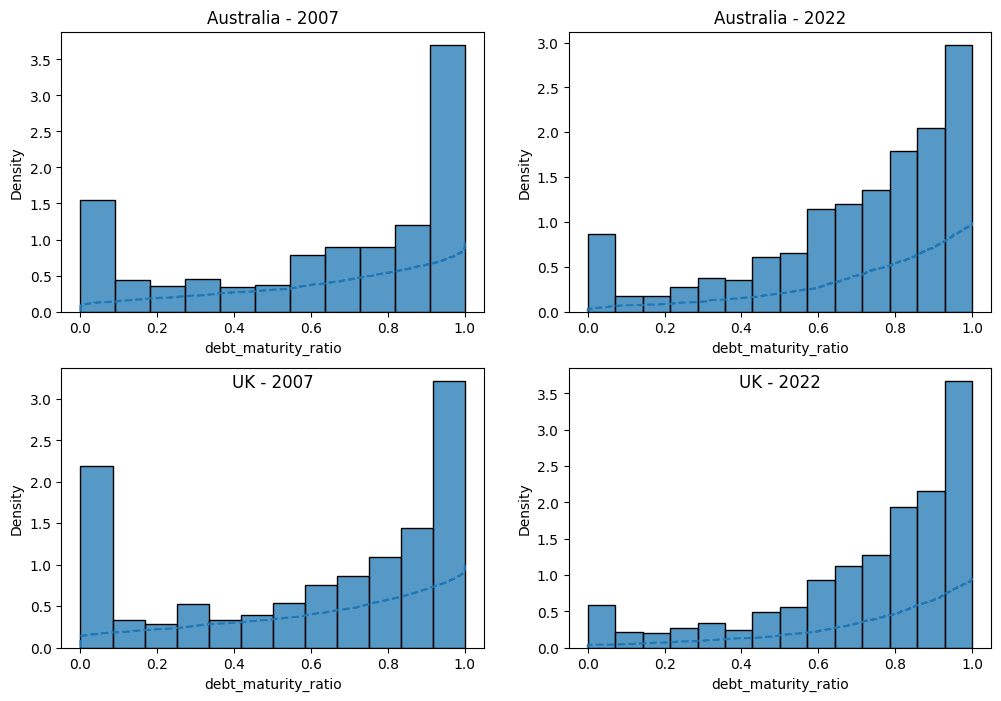

In [13]:
# Plot percentile plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(australia_2007['debt_maturity_ratio'], ax=axs[0, 0], stat='density')
sns.ecdfplot(australia_2007['debt_maturity_ratio'], ax=axs[0, 0], linestyle='--')
axs[0, 0].set_title('Australia - 2007')
sns.histplot(australia_2022['debt_maturity_ratio'], ax=axs[0, 1], stat='density')
sns.ecdfplot(australia_2022['debt_maturity_ratio'], ax=axs[0, 1], linestyle='--')
axs[0, 1].set_title('Australia - 2022')
sns.histplot(uk_2007['debt_maturity_ratio'], ax=axs[1, 0], stat='density')
sns.ecdfplot(uk_2007['debt_maturity_ratio'], ax=axs[1, 0], linestyle='--')
axs[1, 0].set_title('UK - 2007',y=0.9)
sns.histplot(uk_2022['debt_maturity_ratio'], ax=axs[1, 1], stat='density')
sns.ecdfplot(uk_2022['debt_maturity_ratio'], ax=axs[1, 1], linestyle='--')
axs[1, 1].set_title('UK - 2022',y=0.9)
plt.show()

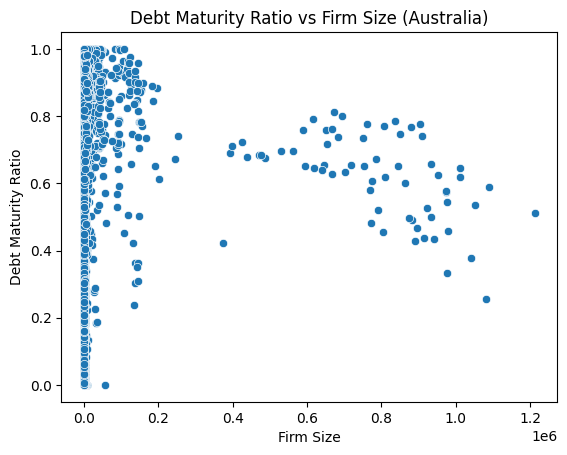

In [14]:
#Create scatter plots for each firm characteristic against debt maturity ratio separately for each country

sns.scatterplot(x=df['TA'], y='debt_maturity_ratio', data=australia)
plt.title('Debt Maturity Ratio vs Firm Size (Australia)')
plt.xlabel('Firm Size')
plt.ylabel('Debt Maturity Ratio')
plt.show()

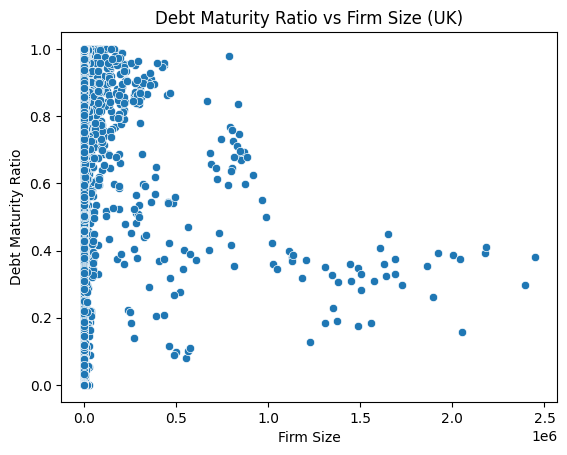

In [15]:
#UK
sns.scatterplot(x=df['TA'], y='debt_maturity_ratio', data=uk)
plt.title('Debt Maturity Ratio vs Firm Size (UK)')
plt.xlabel('Firm Size')
plt.ylabel('Debt Maturity Ratio')
plt.show()


In [16]:
#calculate the correlation coefficients between debt maturity ratio and each firm characteristic using the corr function:
australia.corr()['debt_maturity_ratio']
uk.corr()['debt_maturity_ratio']

C:\Users\ritik\AppData\Local\Temp\ipykernel_22532\3613609136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  australia.corr()['debt_maturity_ratio']
C:\Users\ritik\AppData\Local\Temp\ipykernel_22532\3613609136.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  uk.corr()['debt_maturity_ratio']


year                   0.107209
TA                    -0.029751
SALES_USD              0.047969
MKT_EQUITY             0.069348
BOOK_EQUITY            0.030389
ST_DEBT               -0.055640
LT_DEBT                0.018056
NPPE                   0.076603
INTEREST               0.014556
EBIT                   0.035560
EBITDA                 0.050054
CASH                   0.078645
TA_USD                -0.030436
DIVIDEND               0.055873
NET_INCOME             0.037687
NATION                      NaN
debt_maturity_ratio    1.000000
Name: debt_maturity_ratio, dtype: float64

In [17]:
#perform simple linear regressions between debt maturity ratio and each firm characteristic separately. For example, for Australia:
import statsmodels.api as sm
X = sm.add_constant(australia[['TA']])
Y = australia['debt_maturity_ratio']
model = sm.OLS(Y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     debt_maturity_ratio   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.473
Date:                 Wed, 22 Mar 2023   Prob (F-statistic):              0.225
Time:                         12:46:29   Log-Likelihood:                -3806.1
No. Observations:                10421   AIC:                             7616.
Df Residuals:                    10419   BIC:                             7631.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6484      0.003    188.43

In [18]:
df2=df

In [19]:
df2.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,-15.477,-12.604,17.489,95.218,0.0,-25.043,36,Australia,0.991081
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,-88.724,-86.606,17.181,31.992,0.0,-93.479,36,Australia,0.989539
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,-16.383,-15.821,15.939,39.226,0.0,-21.670,36,Australia,0.771123
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,-2.827,-2.443,2.037,10.955,0.0,-6.018,36,Australia,0.997348
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,-89.595,-55.479,142.521,819.914,0.0,-81.811,36,Australia,0.914123


In [20]:
df2['Tangibility']=df2['NPPE']/df2['TA']
df2['Market_to_book']= (df2['TA'] + df2['MKT_EQUITY'] - df2['BOOK_EQUITY']) /df2['TA']
df2['Log_TA'] = np.log(df2['TA_USD'])
df2['Profitability']=df2['EBITDA']/df2['TA']

In [21]:
df2.shape

(101055, 23)

In [22]:
df2.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio,Tangibility,Market_to_book,Log_TA,Profitability
0,C036AAB00,2009,117.976,35.002,33.991,40.024,0.599,66.559,78.924,7.844,...,95.218,0.0,-25.043,36,Australia,0.991081,0.668984,0.948862,4.556169,-0.106835
1,C036AAB00,2010,38.070,12.213,72.877,-25.373,0.624,59.028,7.547,4.726,...,31.992,0.0,-93.479,36,Australia,0.989539,0.198240,3.580772,3.465486,-2.274915
2,C036AAB00,2011,36.598,15.091,41.710,-35.724,14.907,50.224,6.660,5.288,...,39.226,0.0,-21.670,36,Australia,0.771123,0.181977,3.115799,3.669340,-0.432291
3,C036AAB00,2012,10.703,38.911,1.182,-24.373,0.083,31.215,0.681,3.243,...,10.955,0.0,-6.018,36,Australia,0.997348,0.063627,3.387648,2.393796,-0.228254
4,C036ABF00,2007,934.705,108.515,449.345,403.748,21.303,226.760,697.729,23.006,...,819.914,0.0,-81.811,36,Australia,0.914123,0.746470,1.048782,6.709199,-0.059355


In [23]:
df_aus=australia

In [24]:
#searching for 2022 data
df_aus = df_aus[df_aus['year'] == 2022]

In [25]:
df_aus.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio
19,C036ABF00,2022,3293.018,950.696,1968.352,2438.788,42.278,347.329,2438.054,16.013,256.359,588.168,122.138,2243.204,0.000,191.295,36,Australia,0.891486
35,C036AFQ10,2022,1216.262,437.933,1128.149,1054.183,22.382,24.465,649.750,2.735,118.070,285.950,304.298,839.379,0.000,77.681,36,Australia,0.522232
51,C036AIA00,2022,213.067,190.547,20.007,85.565,70.491,19.512,58.624,1.044,10.510,18.942,20.131,147.044,1.015,7.171,36,Australia,0.216793
81,C036AJ830,2022,913.359,283.781,1375.633,740.641,7.910,150.052,34.301,5.166,148.181,158.691,29.705,630.336,49.983,100.716,36,Australia,0.949925
88,C036AQ300,2022,25.186,10.229,35.690,10.804,2.031,2.259,3.212,NaN,NaN,NaN,8.937,17.382,0.000,-1.936,36,Australia,0.526573


In [26]:
df_uk = uk

In [27]:
df_uk = df_uk[df_uk['year'] == 2021]

In [28]:
#dropping na from the table
df_aus = df_aus.dropna()

In [29]:
df_aus.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,EBIT,EBITDA,CASH,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio
19,C036ABF00,2022,3293.018,950.696,1968.352,2438.788,42.278,347.329,2438.054,16.013,256.359,588.168,122.138,2243.204,0.000,191.295,36,Australia,0.891486
35,C036AFQ10,2022,1216.262,437.933,1128.149,1054.183,22.382,24.465,649.750,2.735,118.070,285.950,304.298,839.379,0.000,77.681,36,Australia,0.522232
51,C036AIA00,2022,213.067,190.547,20.007,85.565,70.491,19.512,58.624,1.044,10.510,18.942,20.131,147.044,1.015,7.171,36,Australia,0.216793
81,C036AJ830,2022,913.359,283.781,1375.633,740.641,7.910,150.052,34.301,5.166,148.181,158.691,29.705,630.336,49.983,100.716,36,Australia,0.949925
99,C036AU880,2022,31.050,56.540,14.585,12.733,1.916,1.102,2.426,0.140,-8.073,-3.611,5.228,21.429,0.000,-4.870,36,Australia,0.365142


In [30]:
df_uk = df_uk.dropna()

In [31]:
df_aus['Tangibility']=df_aus['NPPE']/df_aus['TA']
df_aus['Market_to_book']= (df_aus['TA'] + df_aus['MKT_EQUITY'] - df_aus['BOOK_EQUITY']) /df_aus['TA']
df_aus['Log_TA'] = np.log(df_aus['TA_USD'])
df_aus['Profitability']=df_aus['EBITDA']/df_aus['TA']

In [32]:
df_aus.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio,Tangibility,Market_to_book,Log_TA,Profitability
19,C036ABF00,2022,3293.018,950.696,1968.352,2438.788,42.278,347.329,2438.054,16.013,...,2243.204,0.000,191.295,36,Australia,0.891486,0.740371,0.857141,7.715660,0.178611
35,C036AFQ10,2022,1216.262,437.933,1128.149,1054.183,22.382,24.465,649.750,2.735,...,839.379,0.000,77.681,36,Australia,0.522232,0.534219,1.060814,6.732662,0.235106
51,C036AIA00,2022,213.067,190.547,20.007,85.565,70.491,19.512,58.624,1.044,...,147.044,1.015,7.171,36,Australia,0.216793,0.275143,0.692313,4.990732,0.088902
81,C036AJ830,2022,913.359,283.781,1375.633,740.641,7.910,150.052,34.301,5.166,...,630.336,49.983,100.716,36,Australia,0.949925,0.037555,1.695227,6.446253,0.173744
99,C036AU880,2022,31.050,56.540,14.585,12.733,1.916,1.102,2.426,0.140,...,21.429,0.000,-4.870,36,Australia,0.365142,0.078132,1.059646,3.064745,-0.116296


In [33]:
df_uk['Tangibility']=df_uk['NPPE']/df_uk['TA']
df_uk['Market_to_book']= (df_uk['TA'] + df_uk['MKT_EQUITY'] - df_uk['BOOK_EQUITY']) /df_uk['TA']
df_uk['Log_TA'] = np.log(df_uk['TA_USD'])
df_uk['Profitability']=df_uk['EBITDA']/df_uk['TA']

In [34]:
df_uk.head()

,ws_num,year,TA,SALES_USD,MKT_EQUITY,BOOK_EQUITY,ST_DEBT,LT_DEBT,NPPE,INTEREST,...,TA_USD,DIVIDEND,NET_INCOME,NATION,COUNTRY,debt_maturity_ratio,Tangibility,Market_to_book,Log_TA,Profitability
94789,C826AA790,2021,508.447,312.041,378.640,349.44,53.58,1.021,27.93,0.806,...,688.020,7.62,28.16,826,UK,0.018699,0.054932,1.057430,6.533818,0.080573
94806,C826AB520,2021,35.600,118.182,91.342,-43.00,0.30,20.100,1.70,8.900,...,49.036,0.00,-21.50,826,UK,0.985294,0.047753,4.773652,3.892555,-0.294944
94931,C826AF140,2021,14656.000,24442.069,27188.651,4891.00,661.00,3819.000,1594.00,117.000,...,19752.038,0.00,357.00,826,UK,0.852455,0.108761,2.521401,9.891012,0.098049
94960,C826AG470,2021,2559.900,122.727,1725.794,1971.60,13.80,533.200,1900.80,14.100,...,3526.032,31.70,-201.90,826,UK,0.974771,0.742529,0.903978,8.167928,-0.075237
94976,C826AH020,2021,49888.000,29435.252,15352.139,11679.00,1641.00,21196.000,24260.00,714.000,...,68716.230,2.00,1472.00,826,UK,0.928143,0.486289,1.073628,11.137741,0.137448


In [35]:
#Target Vector
df_y = df_aus["debt_maturity_ratio"]

In [36]:
#Features Matrix
df_X = df_aus[["Tangibility", "Market_to_book", "Log_TA", "Profitability"]]

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [38]:
model.fit(df_X,df_y)

LinearRegression()

In [39]:
model.coef_

array([0.00360042, 0.0069129 , 0.05704598, 0.0001063 ])

In [40]:
model.intercept_

0.3657112446747178

In [41]:
yfit = model.predict(df_X)

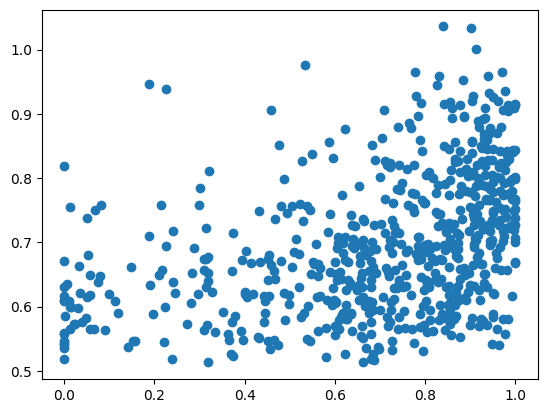

In [42]:
plt.scatter(df_y,yfit);

C:\Users\ritik\AppData\Local\Temp\ipykernel_22532\864140131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df_y-yfit),bins=50);


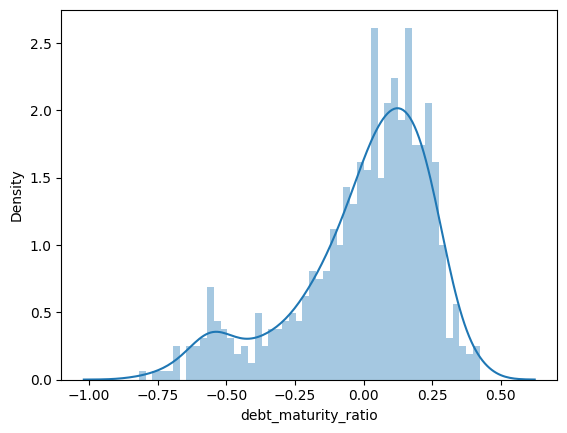

In [43]:
sns.distplot((df_y-yfit),bins=50);

In [44]:
#for uk
#Target Vector
df_a =  df_uk["debt_maturity_ratio"]
#Features Matrix
df_b = df_uk[["Tangibility", "Market_to_book", "Log_TA", "Profitability"]]

In [45]:
model.fit(df_b,df_a)

LinearRegression()

In [46]:
model.coef_

array([ 0.07967442,  0.00586608,  0.04499412, -0.11864499])

In [47]:
model.intercept_

0.438821614748275

In [48]:
yfit = model.predict(df_X)

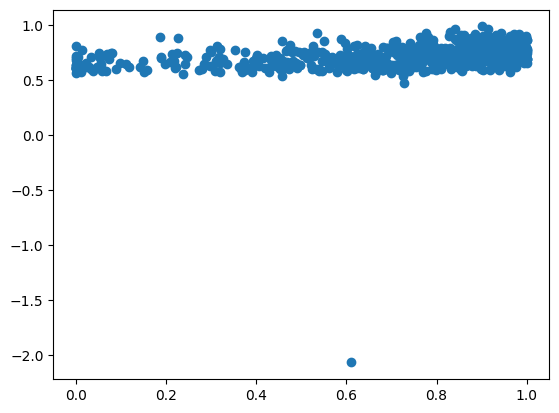

In [49]:
plt.scatter(df_y,yfit);

C:\Users\ritik\AppData\Local\Temp\ipykernel_22532\864140131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df_y-yfit),bins=50);


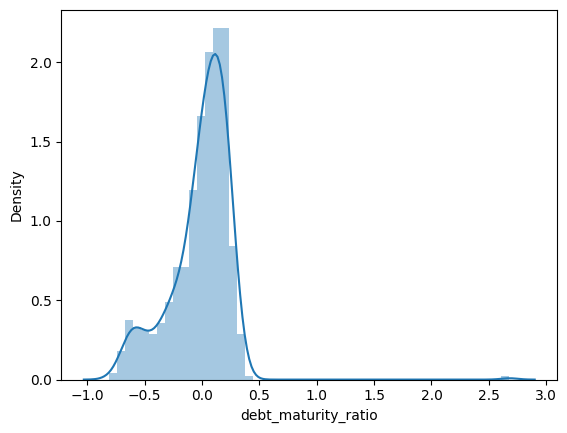

In [50]:
sns.distplot((df_y-yfit),bins=50);

In [133]:
CorrMatrix = df1_au1.corr()

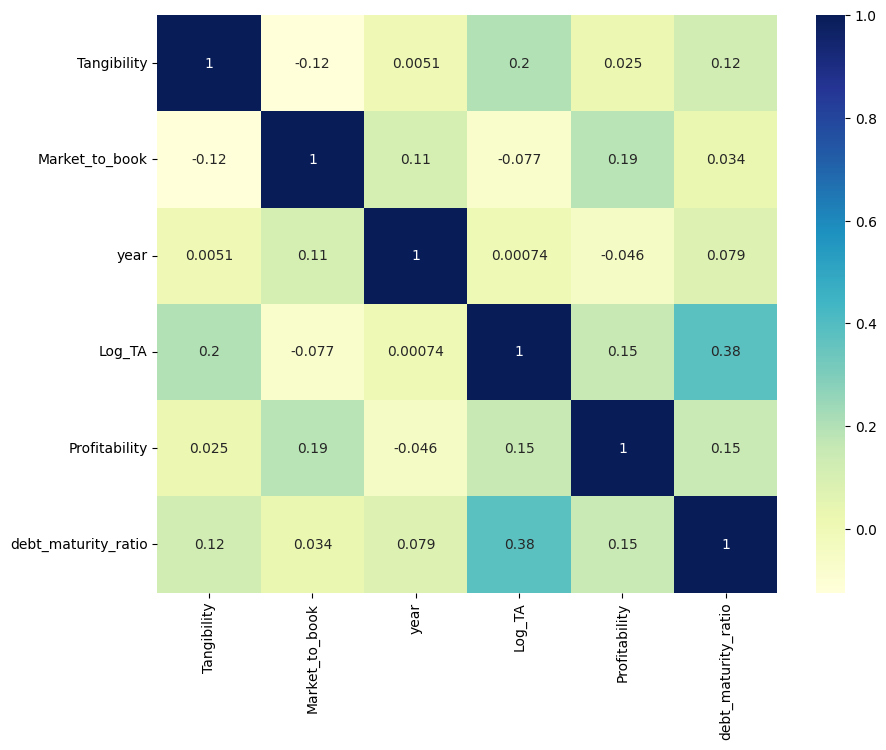

In [134]:
plt.subplots(figsize=(10,7.5))
sns.heatmap(CorrMatrix,annot=True,cmap="YlGnBu")
plt.show()